<a href="https://colab.research.google.com/github/SARU230/Matplot_lib_for-gromacs/blob/main/python_script_for_gromacs_rdf_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving N1.xvg to N1.xvg
Saving N2.xvg to N2.xvg
Saving N3.xvg to N3.xvg
Saving N4.xvg to N4.xvg
Saving N5.xvg to N5.xvg


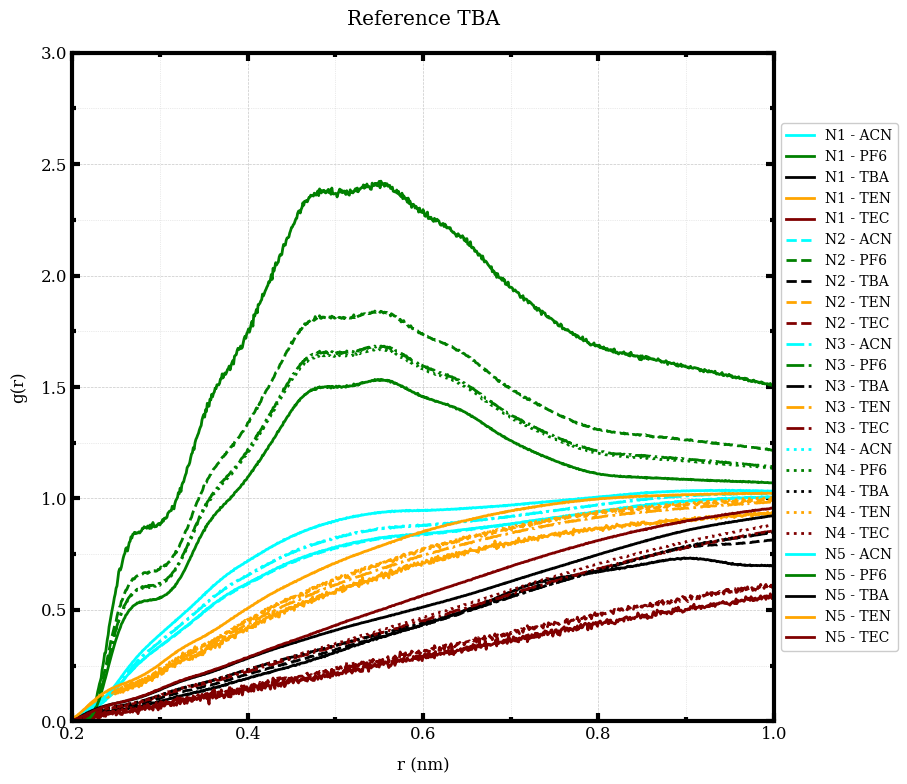

In [ ]:
#@title Enhanced GROMACS RDF Plotter in Google Colab

#@markdown ### Import required libraries
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import io
import os

#@markdown ---
#@markdown ### Upload your RDF files
uploaded = files.upload()

#@markdown ---
#@markdown ### Plot Configuration
plot_title = "Reference TBA" #@param {type:"string"}
x_label = "r (nm)" #@param {type:"string"}
y_label = "g(r)" #@param {type:"string"}
grid_visible = True #@param {type:"boolean"}
frame_width = 3 #@param {type:"slider", min:1, max:5, step:1}

#@markdown ---
#@markdown ### Axis Configuration
x_min = 0.2 #@param {type:"number"}
x_max = 1 #@param {type:"number"}
x_major = 0.2 #@param {type:"number"}
x_minor = 0.1 #@param {type:"number"}

y_min = 0 #@param {type:"number"}
y_max = 3 #@param {type:"number"}
y_major = 0.5 #@param {type:"number"}
y_minor = 0.25 #@param {type:"number"}

#@markdown ---
#@markdown ### Color and Style Configuration
molecule_colors = {
    'TEC': 'maroon',
    'TEN': 'orange',
    'TBA': 'black',
    'PF6': 'green',
    'ACN': 'cyan'
}

# Line styles for up to 5 files
file_line_styles = "solid, dashed, dashdot, dotted, solid" #@param {type:"string"
#file_line_styles = "-, --, :, -., (0, (3, 1, 1, 1))" #@param {type:"string"}
line_width = 2 #@param {type:"slider", min:1, max:5, step:0.5}

#@markdown ---
#@markdown ### Legend Configuration
legend_position = "outside" #@param ["outside", "best", "upper right", "lower right"]
legend_columns = 1 #@param {type:"slider", min:1, max:5, step:1}
legend_fontsize = 10 #@param {type:"slider", min:8, max:14, step:1}
legend_frame = True #@param {type:"boolean"}

# Process the style inputs
styles = [s.strip() for s in file_line_styles.split(',')]

# Set up plot style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = frame_width

# Create figure with adjusted size to accommodate external legend
fig, ax = plt.subplots(figsize=(8, 8))

# Process each uploaded file
for i, (filename, content) in enumerate(uploaded.items()):
    try:
        style = styles[i % len(styles)]

        # Read data from XVG file
        data = []
        for line in io.StringIO(content.decode('utf-8')):
            if not line.startswith(('#', '@')):
                data.append(list(map(float, line.split())))

        data = np.array(data)
        r = data[:, 0]
        g_r = data[:, 1:]

        # Plot each curve
        for j in range(g_r.shape[1]):
            molecule = ['ACN', 'PF6', 'TBA', 'TEN', 'TEC'][j]
            ax.plot(r, g_r[:, j],
                    label=f"{os.path.splitext(filename)[0]} - {molecule}",
                    color=molecule_colors[molecule],
                    linestyle=style,
                    linewidth=line_width)

    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

# Customize plot appearance
ax.set_title(plot_title, pad=20)
ax.set_xlabel(x_label, labelpad=10)
ax.set_ylabel(y_label, labelpad=10)

# Set axis limits and ticks
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.xaxis.set_major_locator(plt.MultipleLocator(x_major))
ax.xaxis.set_minor_locator(plt.MultipleLocator(x_minor))
ax.yaxis.set_major_locator(plt.MultipleLocator(y_major))
ax.yaxis.set_minor_locator(plt.MultipleLocator(y_minor))

# Customize tick appearance
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.tick_params(which='major', length=6, width=frame_width)
ax.tick_params(which='minor', length=3, width=frame_width)

# Grid settings
if grid_visible:
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Legend configuration
if legend_position == "outside":
    # Shrink current axis by 20% to make room for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put legend to the right of the current axis
    legend = ax.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        ncol=legend_columns,
        fontsize=legend_fontsize,
        frameon=legend_frame,
        framealpha=1
    )
else:
    legend = ax.legend(
        loc=legend_position,
        ncol=legend_columns,
        fontsize=legend_fontsize,
        frameon=legend_frame,
        framealpha=1
    )

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#@markdown ---
#@markdown ### Save the plot
save_plot = False #@param {type:"boolean"}
if save_plot:
    output_filename = "rdf_comparison.png" #@param {type:"string"}
    fig.savefig(output_filename, dpi=300, bbox_inches='tight')
    files.download(output_filename)
    print(f"Plot saved as {output_filename} and downloaded to your computer")